<a href="https://colab.research.google.com/github/erafferty98/friendly-spoon/blob/master/dstacwk_E_RAFFERTY_13199996.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load CSV
import csv
import numpy
import pandas as pd
from numpy import loadtxt
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
%matplotlib inline
filename = 'openpowerlifting.csv'
data = read_csv(filename)
# rows and columns
print(data.shape)
# first 5 rows
print(data.head(5))
# data types (fload and object)
print(data.dtypes)

pd.set_option('max_rows', 99999)
pd.set_option('max_columns', 1000)

# sex of participants
class_counts = data.groupby('Sex').size()
print(class_counts)

#explore if any rows are non-unique
df_nUnique = data.loc[:, data.nunique() == 1]
df_nUnique.head()

description = data.describe()
print(description)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1423354, 37)
              Name Sex Event  ... MeetCountry  MeetState       MeetName
0     Abbie Murphy   F   SBD  ...   Australia        VIC  Melbourne Cup
1      Abbie Tuong   F   SBD  ...   Australia        VIC  Melbourne Cup
2   Ainslee Hooper   F     B  ...   Australia        VIC  Melbourne Cup
3  Amy Moldenhauer   F   SBD  ...   Australia        VIC  Melbourne Cup
4     Andrea Rowan   F   SBD  ...   Australia        VIC  Melbourne Cup

[5 rows x 37 columns]
Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg       

In [ ]:
print("percentage NA Tested:",((data['Tested']).isna().sum()/1423354)*100)

percentage NA Tested: 23.14687702426803


In [ ]:
print("age is zero?",data[data['Age']==0])

age is zero?                    Name Sex Event   Equipment  Age AgeClass       Division  \
85488     Sean Sullivan   M   SBD  Single-ply  0.0      NaN            NaN   
92469      Calvin Davis   M     D   Multi-ply  0.0      NaN  Masters 70-74   
92625      Calvin Davis   M     B   Multi-ply  0.0      NaN  Masters 70-74   
116324       J. Johnson   M     B  Single-ply  0.0      NaN     Teen 16-17   
121801   Phillip Garcia   M     B   Multi-ply  0.0      NaN     Teen 16-17   
212204   Brett Johnston   M     B  Single-ply  0.0      NaN       Under 17   
1303887     Ryan Cooper   M   SBD  Single-ply  0.0      NaN           Open   
1380602       O. Garcia   M   SBD  Single-ply  0.0      NaN           Open   

         BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  \
85488            75.0            75     200.0     217.5    -227.5       NaN   
92469           125.0           125       NaN       NaN       NaN       NaN   
92625           125.0           125       NaN  

In [ ]:
powerlifting = data[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg','Wilks','IPFPoints']]

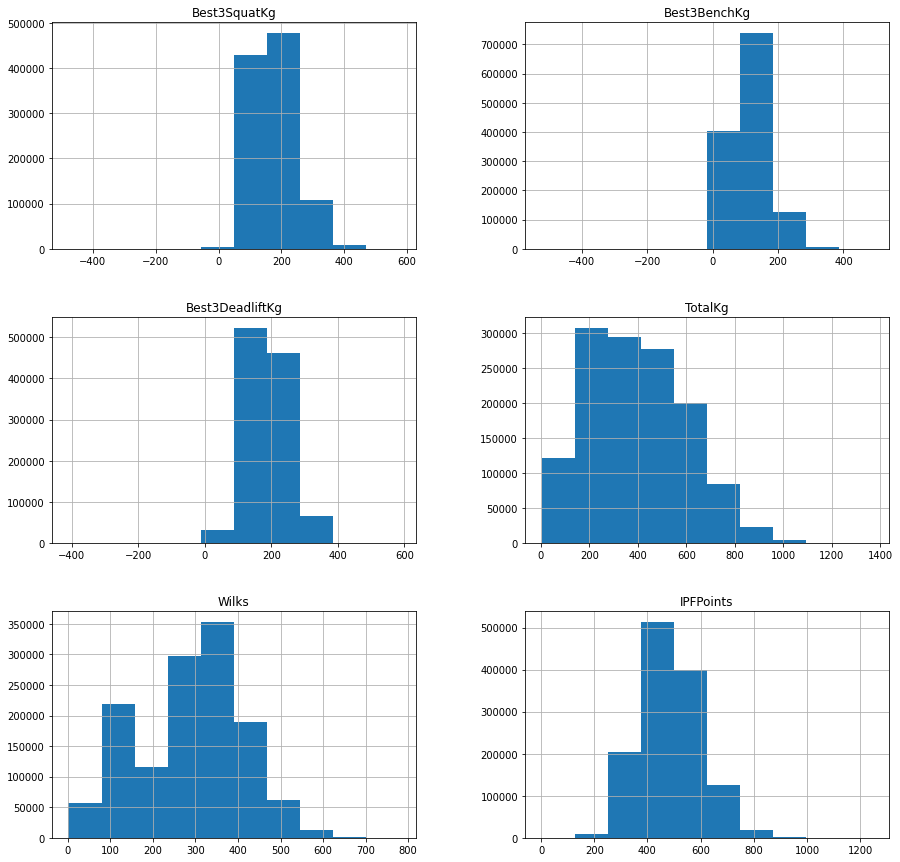

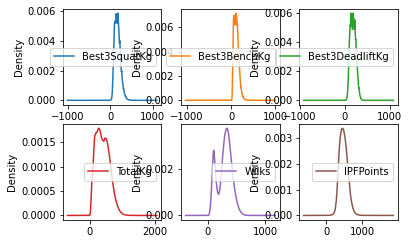

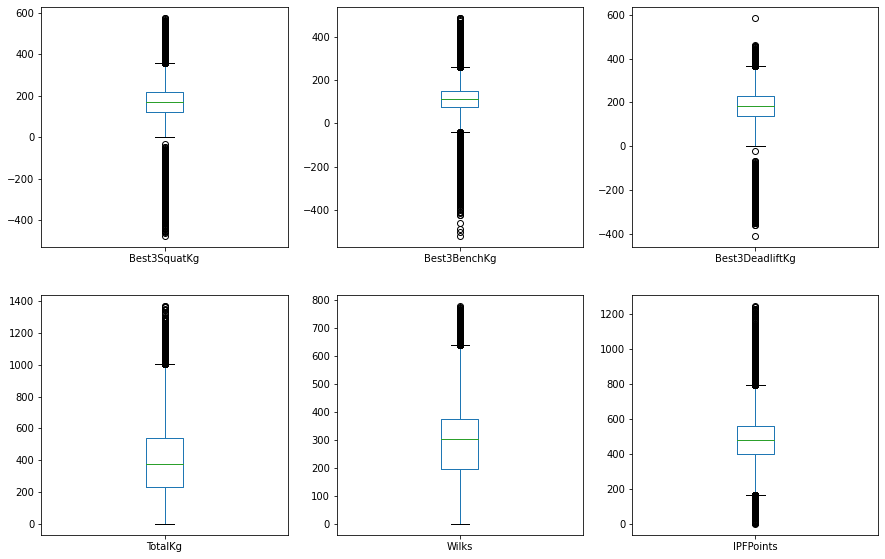

                 Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Wilks  IPFPoints
Best3SquatKg            1.000         0.884            0.888    0.967  0.775      0.633
Best3BenchKg            0.884         1.000            0.867    0.484  0.184      0.622
Best3DeadliftKg         0.888         0.867            1.000    0.865  0.608      0.674
TotalKg                 0.967         0.484            0.865    1.000  0.881      0.267
Wilks                   0.775         0.184            0.608    0.881  1.000      0.263
IPFPoints               0.633         0.622            0.674    0.267  0.263      1.000


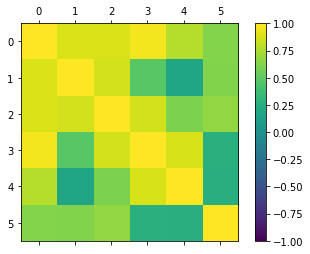

In [ ]:
powerlifting.hist(figsize=[15.0,15.0],bins=10)
pyplot.show()
set_option('display.width', 100)
set_option('precision', 3)
powerlifting.plot(kind='kde', subplots=True, layout=(3,3), sharex=False,figsize=(6.0,6.0))
pyplot.show()
powerlifting.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(15.0,15.0))
pyplot.show()
# plot correlation matrix
correlations = powerlifting.corr(method='pearson')
print(correlations)
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
pyplot.show()

In [ ]:
duplicate_count = len(data)-len(data.drop_duplicates())
print(duplicate_count)

3084


In [ ]:
print("percentage NA Country:",((data['Country']).isna().sum()/1423354)*100)
print("percentage NA MeetCountry:",((data['MeetCountry']).isna().sum()/1423354)*100)

percentage NA Country: 72.67833581807477
percentage NA MeetCountry: 0.0


In [ ]:
print("min of each of the three lifts/total")
print(min(d for d in data['Best3SquatKg'] if d>=0))
print(min(d for d in data['Best3BenchKg'] if d>=0))
print(min(d for d in data['Best3DeadliftKg'] if d>=0))
print(min(d for d in data['TotalKg'] if d>=0))

min of each of the three lifts/total
2.72
2.5
2.27
2.5


In [ ]:
print("percentage null 4th Squat:",((data['Squat4Kg']).isna().sum()/1423354)*100)
print("percentage null 4th Bench:",((data['Bench4Kg']).isna().sum()/1423354)*100)
print("percentage null 4th Deadlift:",((data['Deadlift4Kg']).isna().sum()/1423354)*100)

percentage null 4th Squat: 99.74033163921273
percentage null 4th Bench: 99.33221110138447
percentage null 4th Deadlift: 99.3504075584851


In [ ]:
class_counts = data.groupby('MeetCountry').size()
print(class_counts)

MeetCountry
Algeria                       89
Argentina                   5973
Aruba                        145
Australia                  40777
Austria                     3218
Azerbaijan                   561
Belarus                     2443
Belgium                     1386
Bosnia and Herzegovina       352
Brazil                      1844
British Virgin Islands        53
Bulgaria                    1232
Canada                     46586
Cayman Islands               222
Chile                        226
China                        473
Colombia                     330
Costa Rica                   320
Croatia                     2981
Czechia                    34746
Denmark                    15040
Ecuador                      737
Egypt                         41
El Salvador                   27
England                    25405
Estonia                      773
Fiji                         156
Finland                    32566
France                      5263
Georgia                      55

In [ ]:
#print data where name = "Emma Rafferty"
me_in_data  = data[data['Name'] == "Emma Rafferty"] 
print(me_in_data)

                  Name Sex Event Equipment   Age AgeClass  Division  \
232722   Emma Rafferty   F   SBD       Raw  23.5    24-34  F-C-Open   
236814   Emma Rafferty   F   SBD       Raw  23.5    24-34  F-C-Open   
239975   Emma Rafferty   F   SBD       Raw  22.5    20-23  F-C-Open   
240705   Emma Rafferty   F   SBD       Raw  24.5    24-34  F-C-Open   
637957   Emma Rafferty   F   SBD       Raw  23.5    24-34      Open   
772427   Emma Rafferty   F     B       Raw  24.5    24-34      Open   
1059525  Emma Rafferty   F     B       Raw  24.5    24-34      Open   
1383294  Emma Rafferty   F   SBD       Raw  24.5    24-34  F-C-Open   
1385895  Emma Rafferty   F     B       Raw  24.5    24-34  F-C-Open   

         BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  \
232722          45.55            47      90.0      97.5     102.5       NaN   
236814          46.99            47      80.0      85.0      90.0       NaN   
239975          50.30            52      77.5      8

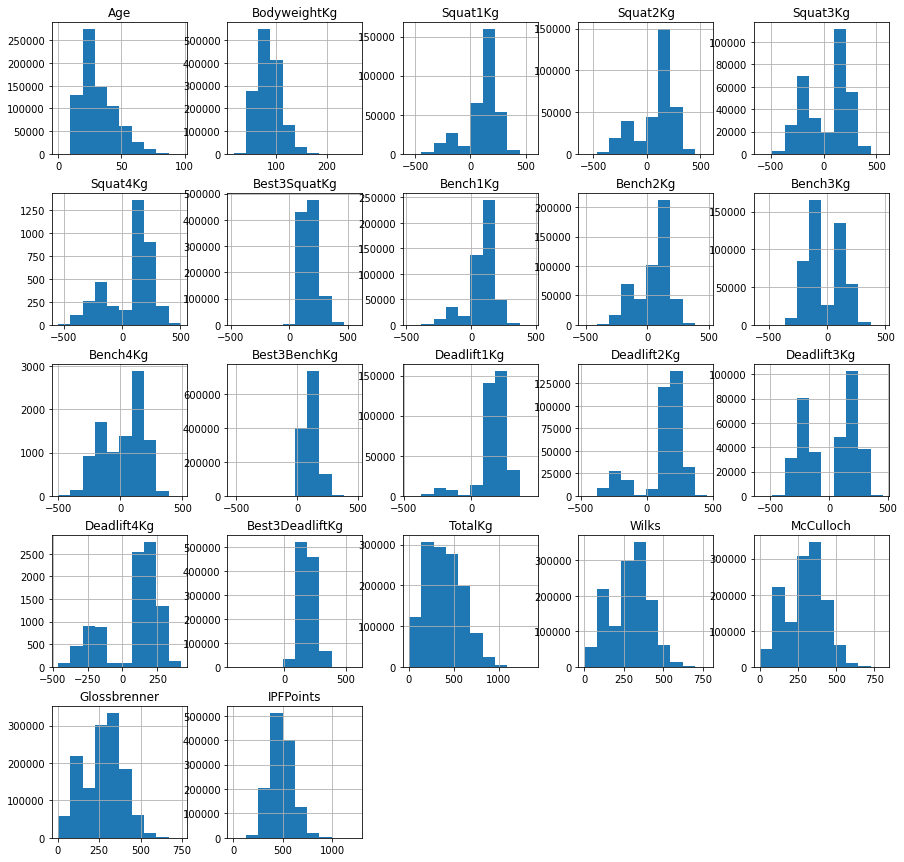

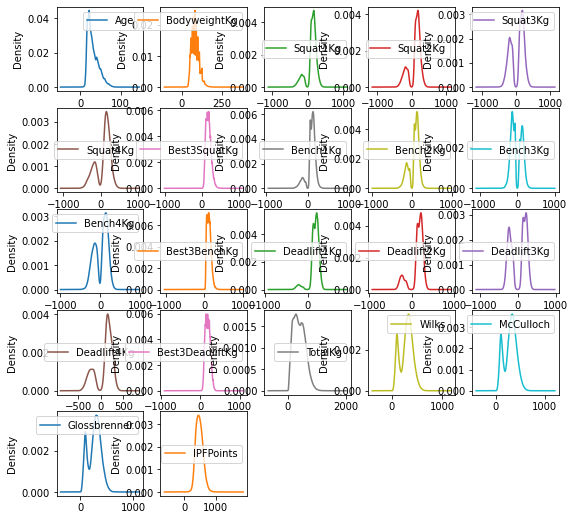

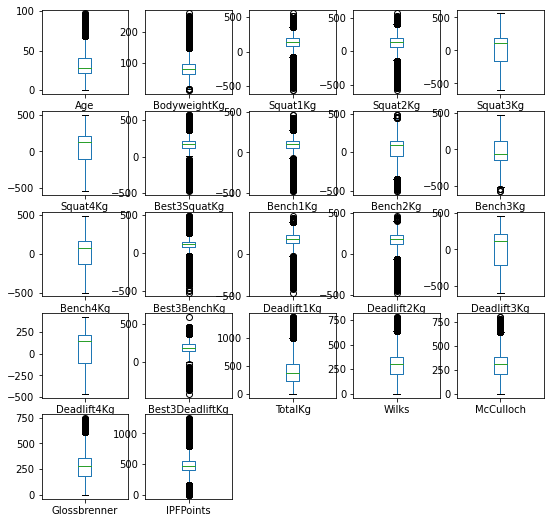

                   Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg   Squat4Kg  Best3SquatKg  \
Age              1.000         0.159    -0.016    -0.013     0.015  5.464e-02         0.015   
BodyweightKg     0.159         1.000     0.162     0.127     0.062  9.529e-02         0.604   
Squat1Kg        -0.016         0.162     1.000     0.149     0.056  5.482e-02         0.333   
Squat2Kg        -0.013         0.127     0.149     1.000     0.128  9.621e-02         0.200   
Squat3Kg         0.015         0.062     0.056     0.128     1.000  6.595e-02         0.065   
Squat4Kg         0.055         0.095     0.055     0.096     0.066  1.000e+00        -0.014   
Best3SquatKg     0.015         0.604     0.333     0.200     0.065 -1.405e-02         1.000   
Bench1Kg         0.026         0.194     0.177     0.128     0.067 -4.099e-02         0.343   
Bench2Kg        -0.003         0.097     0.110     0.119     0.102 -9.001e-04         0.179   
Bench3Kg        -0.020        -0.038     0.045    

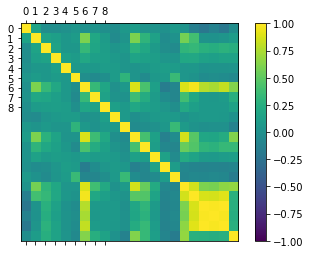

In [ ]:
data.hist(figsize=[15.0,15.0])
pyplot.show()
set_option('display.width', 100)
set_option('precision', 3)
data.plot(kind='kde', subplots=True, layout=(5,5), sharex=False,figsize=(9.0,9.0))
pyplot.show()
data.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False,figsize=(15.0,15.0))
pyplot.show()
# plot correlation matrix
correlations = data.corr(method='pearson')
print(correlations)
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
pyplot.show()

In [ ]:
# type of competition
class_counts = data.groupby('Event').size()
print(class_counts)

Event
B       257179
BD       27598
D        56717
S         4900
SB        2371
SBD    1073237
SD        1352
dtype: int64


In [ ]:
scatter_matrix(powerlifting, figsize=[20, 20])
pyplot.show()

NameError: ignored

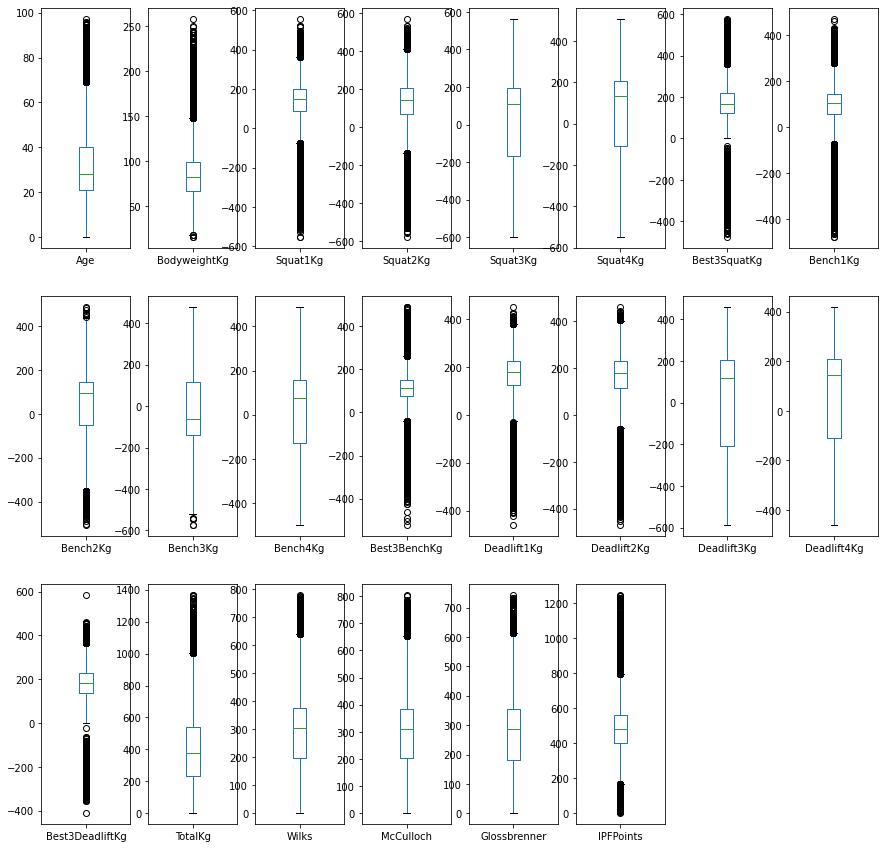

In [ ]:
data.plot(kind='box', subplots=True, layout=(3,8), sharex=False, sharey=False,figsize=(15.0,15.0))
pyplot.show()